# EDA: Lectura del dataset

## 0 descargando los datos

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, log_loss, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import VarianceThreshold, RFE, RFECV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# https://drive.google.com/file/d/17akJOmk-61ECrPwGevDptcNdQljF4cH_/view?usp=sharing
#file_id = '17akJOmk-61ECrPwGevDptcNdQljF4cH_'

data = pd.read_excel("/content/drive/MyDrive/ANEXOS_TESIS/8.Pruebas de modelos de clasificacion/base_FINAL.xlsx")
df=data

In [4]:
data.head()

,frameid,mo_negrot,mo_azult,mo_verdet,mo_rojot,microsegundos,tamaño_imagen,distanciacentro,cluster,class,centrox,centroy,alto,ancho,proba,mo_negrot_i,mo_azult_i,mo_verdet_i,mo_rojot_i,cercania
0,112,50,32,50,51,1,8268,110.50088,1.0,1,734.00064,343.49976,104.00000,79.49988,0.891711,71,61,34,151,0
1,113,50,32,50,51,2,8557,111.50096,1.0,1,734.00064,342.49968,104.99968,81.50004,0.897768,71,62,34,151,0
2,114,50,32,50,51,3,8505,113.00032,1.0,1,735.00032,342.00000,104.99968,81.00000,0.893903,71,61,33,151,0
3,115,50,32,50,51,4,8951,113.99920,1.0,1,735.49952,341.50032,108.49984,82.50012,0.887416,71,64,33,151,0
4,116,50,32,52,51,5,7797,107.00064,1.0,1,738.00064,351.00000,113.00032,69.00012,0.783787,71,61,33,151,0


In [5]:
data.shape

(166, 20)

In [6]:
data.columns

Index(['frameid', 'mo_negrot', 'mo_azult', 'mo_verdet', 'mo_rojot',
       'microsegundos', 'tamaño_imagen', 'distanciacentro', 'cluster', 'class',
       'centrox', 'centroy', 'alto', 'ancho', 'proba', 'mo_negrot_i',
       'mo_azult_i', 'mo_verdet_i', 'mo_rojot_i', 'cercania'],
      dtype='object')

In [7]:
data["cercania"].value_counts()

cercania
0    127
1     39
Name: count, dtype: int64

In [8]:
data["cercania"].value_counts() / data.shape[0]

cercania
0    0.76506
1    0.23494
Name: count, dtype: float64

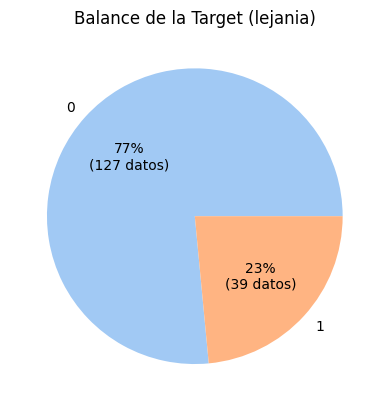

In [13]:
# Agrupamos los valores con .value_counts()
valueDeY = data["cercania"].value_counts()

# Guardamos la paleta de colores actual
current_palette = sns.color_palette()

# Establecemos la paleta de colores pastel
sns.set_palette('pastel')

# Creamos una función personalizada para mostrar el número de datos y el porcentaje
def show_percentage_and_count(val):
    count = int(round(val/100.0 * valueDeY.sum()))
    return '{:.0f}%\n({:} datos)'.format(val, count)

# Creamos el gráfico de pastel
valueDeY.plot.pie(autopct=show_percentage_and_count)
plt.ylabel("")
plt.title("Balance de la Target (lejania)")

# Restauramos la paleta de colores original
sns.set_palette(current_palette)

plt.show()

In [10]:
data.isnull().sum()

frameid            0
mo_negrot          0
mo_azult           0
mo_verdet          0
mo_rojot           0
microsegundos      0
tamaño_imagen      0
distanciacentro    0
cluster            0
class              0
centrox            0
centroy            0
alto               0
ancho              0
proba              0
mo_negrot_i        0
mo_azult_i         0
mo_verdet_i        0
mo_rojot_i         0
cercania           0
dtype: int64

In [ ]:
# Identificamos la fila con NaNs
#rows_with_nan = data[data['name'].isna()]
#rows_with_nan

In [ ]:
#data = data.dropna(subset=["name"])

In [ ]:
#data.isnull().sum()

In [ ]:
#data.isnull().sum()

## 1. Estadistica descriptiva

In [11]:
data.columns

Index(['frameid', 'mo_negrot', 'mo_azult', 'mo_verdet', 'mo_rojot',
       'microsegundos', 'tamaño_imagen', 'distanciacentro', 'cluster', 'class',
       'centrox', 'centroy', 'alto', 'ancho', 'proba', 'mo_negrot_i',
       'mo_azult_i', 'mo_verdet_i', 'mo_rojot_i', 'cercania'],
      dtype='object')

In [12]:
data['cercania'].value_counts()

cercania
0    127
1     39
Name: count, dtype: int64

## 1.2 graficos de resumen

In [14]:
data.columns

Index(['frameid', 'mo_negrot', 'mo_azult', 'mo_verdet', 'mo_rojot',
       'microsegundos', 'tamaño_imagen', 'distanciacentro', 'cluster', 'class',
       'centrox', 'centroy', 'alto', 'ancho', 'proba', 'mo_negrot_i',
       'mo_azult_i', 'mo_verdet_i', 'mo_rojot_i', 'cercania'],
      dtype='object')

In [15]:
# Analisis de la integridad de variables del dataset

import seaborn as sns
sns.set_theme(style="ticks")
graf_ = data[['frameid', 'mo_negrot', 'mo_azult', 'mo_verdet', 'mo_rojot',
       'microsegundos', 'tamaño_imagen', 'distanciacentro', 'cluster', 'class',
       'centrox', 'centroy', 'alto', 'ancho', 'proba', 'mo_negrot_i',
       'mo_azult_i', 'mo_verdet_i', 'mo_rojot_i', 'cercania']]

sns.pairplot(graf_, hue='cercania')

Output hidden; open in https://colab.research.google.com to view.

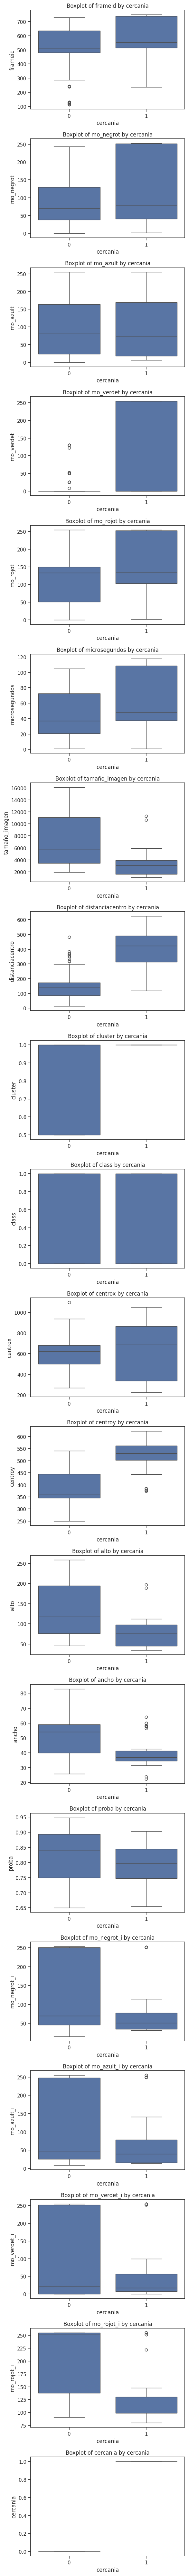

In [16]:
def boxplots_by_5yrs(data, columns):
    sns.set_theme(style="ticks")

    # Create subplots for boxplots
    num_plots = len(columns)
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(6, 4 * num_plots))

    for i, col in enumerate(columns):
        sns.boxplot(x='cercania', y=col, data=data, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col} by cercania')
        axes[i].set_xlabel('cercania')
        axes[i].set_ylabel(col)

    plt.tight_layout()
    plt.show()

# Supongamos que tienes un DataFrame llamado 'graf_'
# y quieres hacer boxplots para las siguientes columnas:
selected_columns = ['frameid', 'mo_negrot', 'mo_azult', 'mo_verdet', 'mo_rojot',
       'microsegundos', 'tamaño_imagen', 'distanciacentro', 'cluster', 'class',
       'centrox', 'centroy', 'alto', 'ancho', 'proba', 'mo_negrot_i',
       'mo_azult_i', 'mo_verdet_i', 'mo_rojot_i', 'cercania']

boxplots_by_5yrs(graf_, selected_columns)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_grid(data, fig_size, grid_size, plot_type, target = ''):

    fig = plt.figure(figsize = fig_size)
    if plot_type == 'histplot':
        for i, column_name in enumerate(data.select_dtypes(exclude = 'object').columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.histplot(data[column_name], kde = True, color = 'royalblue', stat = 'count')
    if plot_type == 'boxplot':
        for i, column_name in enumerate(data.select_dtypes(exclude = 'object').columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.boxplot(x = data[column_name], color = 'royalblue')
    if plot_type == 'countplot':
        target = data[target]
        for i, column_name in enumerate(data.drop(target.name, axis = 1).columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.countplot(x = data[column_name], hue = target, palette = 'Blues_r')
            plot.legend(loc = 'upper right', title = target.name)
    plt.tight_layout()

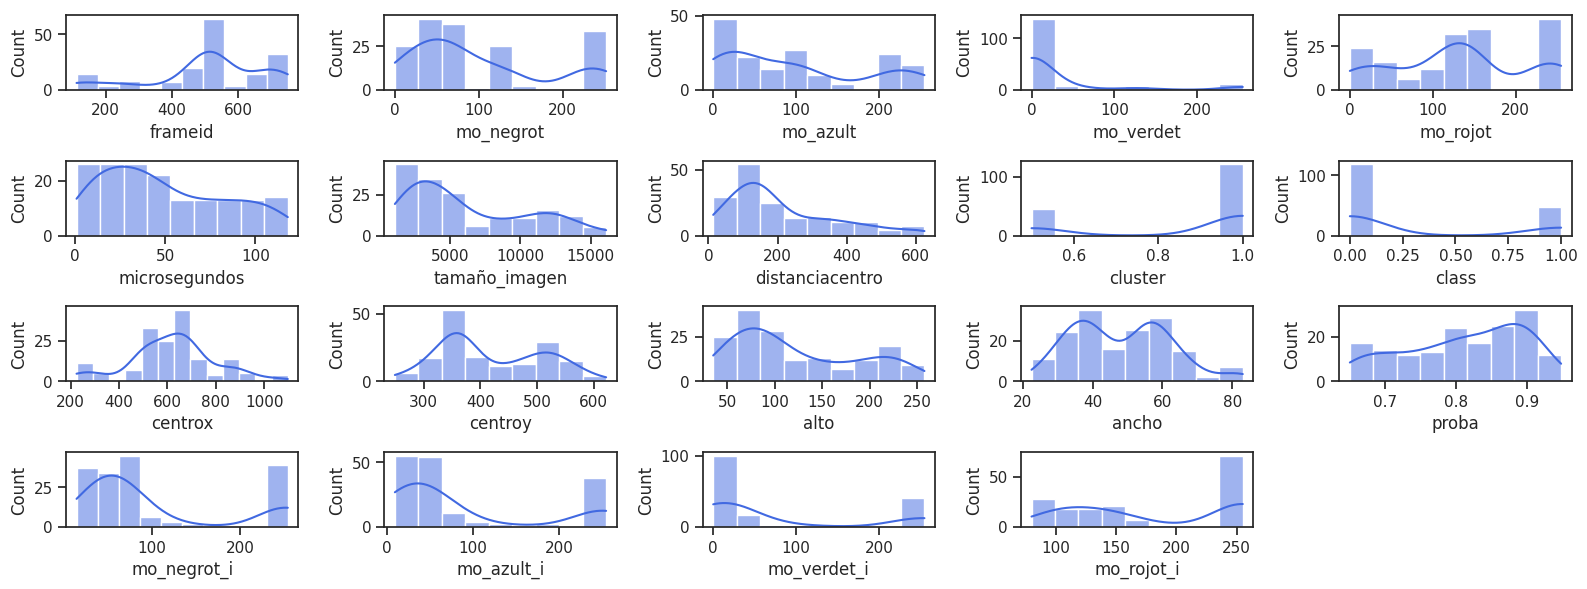

In [ ]:
plot_grid(data.drop(["cercania"], axis=1), (16, 6), (4,5), 'histplot')

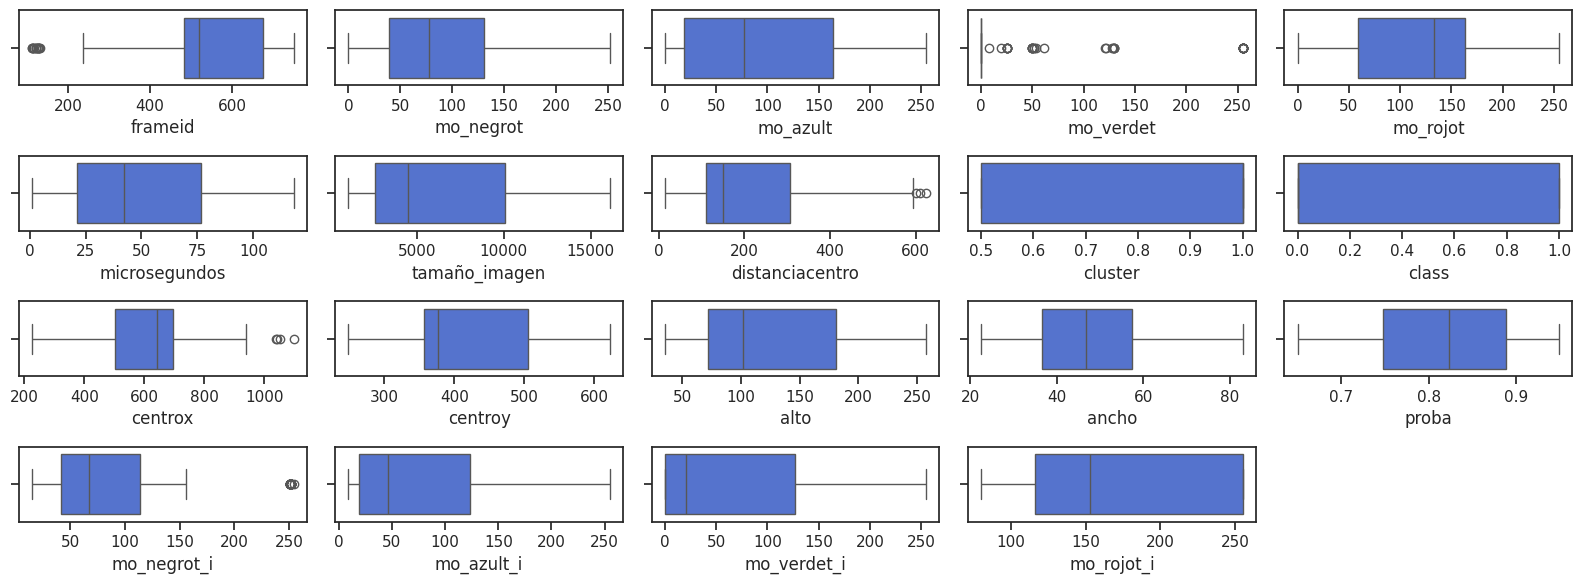

In [18]:
plot_grid(data.drop(["cercania"], axis=1), (16, 6), (4,5), 'boxplot')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   frameid          166 non-null    int64  
 1   mo_negrot        166 non-null    int64  
 2   mo_azult         166 non-null    int64  
 3   mo_verdet        166 non-null    int64  
 4   mo_rojot         166 non-null    int64  
 5   microsegundos    166 non-null    int64  
 6   tamaño_imagen    166 non-null    int64  
 7   distanciacentro  166 non-null    float64
 8   cluster          166 non-null    float64
 9   class            166 non-null    int64  
 10  centrox          166 non-null    float64
 11  centroy          166 non-null    float64
 12  alto             166 non-null    float64
 13  ancho            166 non-null    float64
 14  proba            166 non-null    float64
 15  mo_negrot_i      166 non-null    int64  
 16  mo_azult_i       166 non-null    int64  
 17  mo_verdet_i     

In [20]:
# Calculamos la varianza de las Features
data.apply(np.var).sort_values(ascending=False)[:]

tamaño_imagen      1.724764e+07
centrox            3.005381e+04
frameid            2.920087e+04
distanciacentro    2.233303e+04
mo_verdet_i        1.068238e+04
mo_azult_i         8.440875e+03
centroy            8.139501e+03
mo_azult           7.322782e+03
mo_negrot_i        7.145647e+03
mo_negrot          6.306523e+03
mo_rojot           6.291653e+03
mo_verdet          4.788976e+03
mo_rojot_i         4.492120e+03
alto               4.099945e+03
microsegundos      1.132043e+03
ancho              1.896146e+02
class              2.055451e-01
cercania           1.797431e-01
cluster            4.939940e-02
proba              6.876854e-03
dtype: float64

In [21]:
data.head()

,frameid,mo_negrot,mo_azult,mo_verdet,mo_rojot,microsegundos,tamaño_imagen,distanciacentro,cluster,class,centrox,centroy,alto,ancho,proba,mo_negrot_i,mo_azult_i,mo_verdet_i,mo_rojot_i,cercania
0,112,50,32,50,51,1,8268,110.50088,1.0,1,734.00064,343.49976,104.00000,79.49988,0.891711,71,61,34,151,0
1,113,50,32,50,51,2,8557,111.50096,1.0,1,734.00064,342.49968,104.99968,81.50004,0.897768,71,62,34,151,0
2,114,50,32,50,51,3,8505,113.00032,1.0,1,735.00032,342.00000,104.99968,81.00000,0.893903,71,61,33,151,0
3,115,50,32,50,51,4,8951,113.99920,1.0,1,735.49952,341.50032,108.49984,82.50012,0.887416,71,64,33,151,0
4,116,50,32,52,51,5,7797,107.00064,1.0,1,738.00064,351.00000,113.00032,69.00012,0.783787,71,61,33,151,0


In [22]:
data.reset_index(inplace=True)

In [23]:
data.columns

Index(['index', 'frameid', 'mo_negrot', 'mo_azult', 'mo_verdet', 'mo_rojot',
       'microsegundos', 'tamaño_imagen', 'distanciacentro', 'cluster', 'class',
       'centrox', 'centroy', 'alto', 'ancho', 'proba', 'mo_negrot_i',
       'mo_azult_i', 'mo_verdet_i', 'mo_rojot_i', 'cercania'],
      dtype='object')

## 1.3 Matriz de correlación

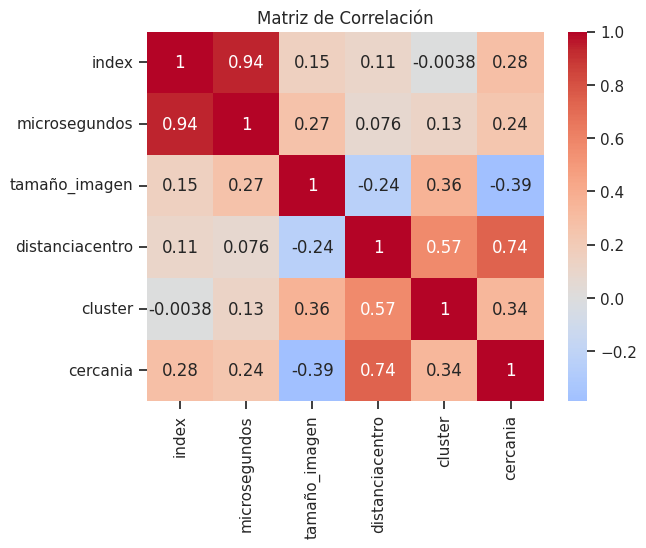

In [24]:
# Calcula la matriz de correlación de todas las variables relacionadas con la variable dependiente (5yrs)
correlation_matrix = data.drop(['frameid', 'mo_negrot', 'mo_azult', 'mo_verdet', 'mo_rojot', 'class',
       'centrox', 'centroy', 'alto', 'ancho', 'proba', 'mo_negrot_i',
       'mo_azult_i', 'mo_verdet_i', 'mo_rojot_i'], axis = 1).corr()

# Grafica la matriz de correlación
# plt.figure(figsize=(30,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

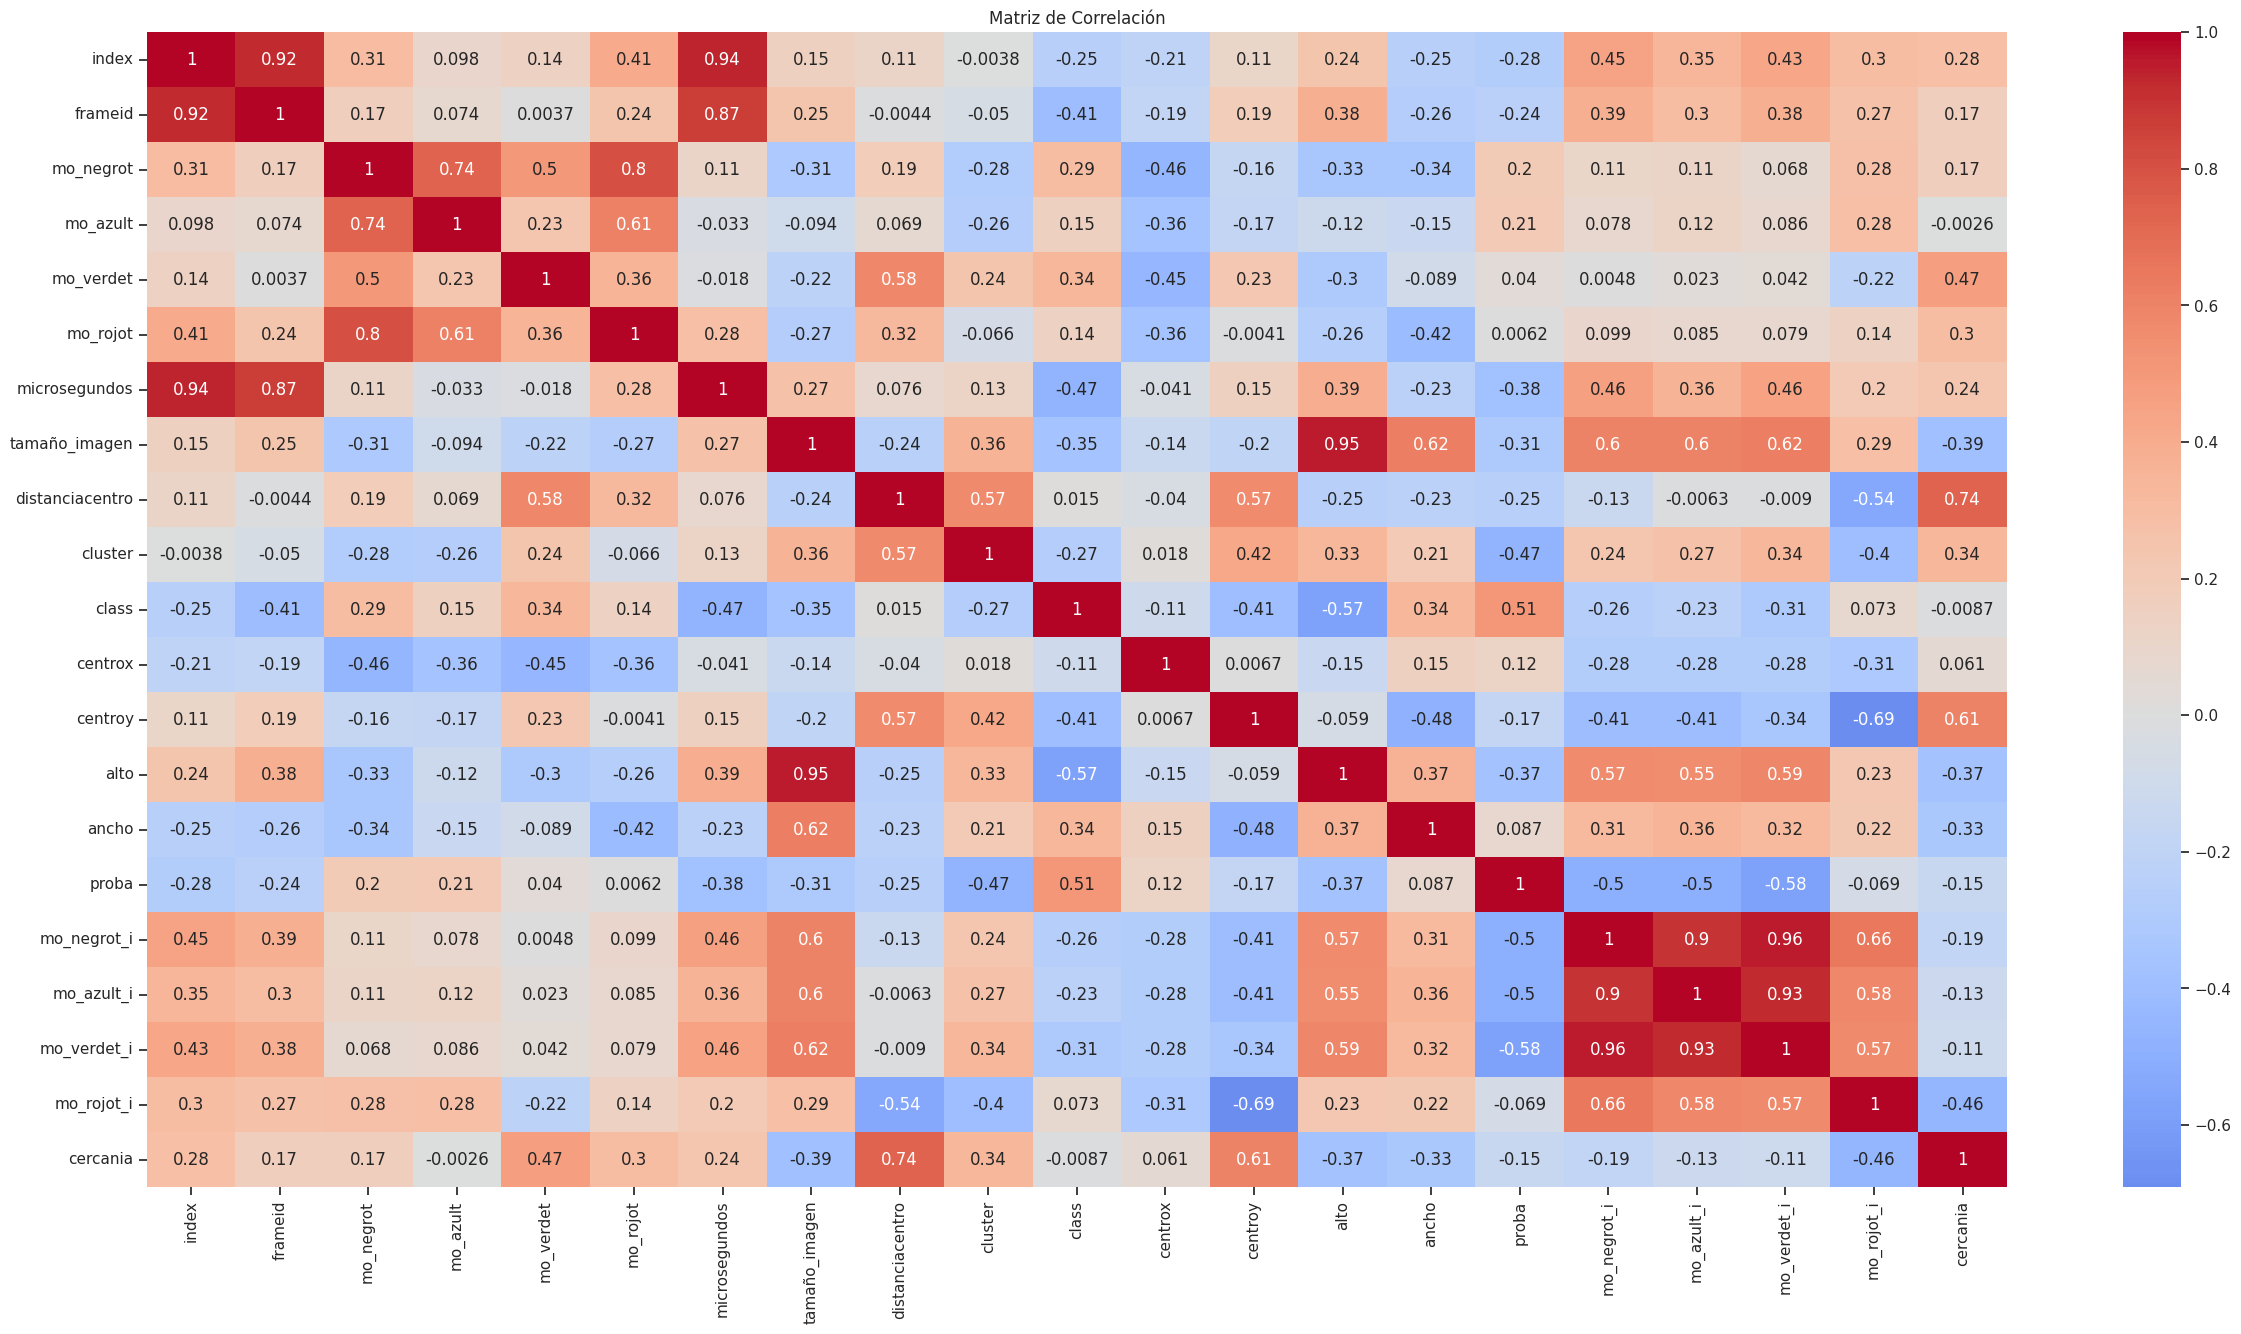

In [25]:
# Calcula la matriz de correlación de todas las variables relacionadas con la variable dependiente (5yrs)
correlation_matrix = data.corr()

# Grafica la matriz de correlación
plt.figure(figsize=(30,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [26]:
data.describe()

,index,frameid,mo_negrot,mo_azult,mo_verdet,mo_rojot,microsegundos,tamaño_imagen,distanciacentro,cluster,...,centrox,centroy,alto,ancho,proba,mo_negrot_i,mo_azult_i,mo_verdet_i,mo_rojot_i,cercania
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.00000,166.000000
mean,82.500000,510.590361,98.331325,97.765060,27.680723,130.265060,49.379518,6217.716867,209.280132,0.864458,...,621.003042,417.927721,122.051217,48.295174,0.812168,103.475904,90.307229,76.331325,180.76506,0.234940
std,48.064193,171.399660,79.653902,85.832177,69.411818,79.559939,33.747646,4165.593950,149.894553,0.222932,...,173.884880,90.492164,64.224552,13.811725,0.083178,84.787699,92.152224,103.668317,67.22607,0.425244
min,0.000000,112.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1080.000000,14.000080,0.500000,...,224.999680,248.999760,35.000000,22.500000,0.650612,15.000000,9.000000,0.000000,80.00000,0.000000
25%,41.250000,483.250000,39.000000,19.000000,0.000000,59.000000,21.250000,2597.000000,110.999880,0.500000,...,500.500480,356.500080,71.500160,36.625050,0.747995,41.500000,19.000000,0.000000,116.25000,0.000000
50%,82.500000,518.500000,78.000000,77.000000,0.000000,133.000000,42.000000,4495.000000,149.250080,1.000000,...,641.749760,377.250120,102.000000,46.750140,0.823149,67.000000,46.500000,20.500000,153.00000,0.000000
75%,123.750000,676.750000,130.750000,164.500000,0.000000,163.000000,76.750000,10060.750000,306.250520,1.000000,...,694.375040,505.624860,181.125120,57.499920,0.887776,114.000000,123.250000,126.750000,255.00000,0.000000
max,165.000000,750.000000,252.000000,255.000000,255.000000,255.000000,118.000000,16093.000000,625.000560,1.000000,...,1096.999680,622.000080,258.000000,83.000160,0.948622,254.000000,255.000000,255.000000,255.00000,1.000000


## 1.4 Grafico interactivo

In [ ]:
#@title Install the facets_overview pip package.
!pip install facets-overview

In [ ]:
# Display the Dive visualization for the training data.
from IPython.core.display import display, HTML

jsonstr = data.to_json(orient='records')
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))

# 2. Modelos

In [27]:
# Función para evaluar los modelos (Gráfico de AUC y Métricas Importantes)

def evaluarElModelo(xtest, ytest, modelo):
    # Obtenemos las probabilidades predichas para la clase positiva (5yrs = 1)
    y_pred_proba_positive = modelo.predict_proba(xtest)[:, 1]

    # Calculamos las métricas
    y_pred = modelo.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    roc_auc = roc_auc_score(ytest, y_pred_proba_positive)
    logloss = log_loss(ytest, y_pred)

    # Graficamos la curva ROC
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba_positive)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Imprimimos las métricas
    print(f'Exactitud: {accuracy:.2f}')
    print(f'Sensibilidad: {recall:.2f}')
    print(f'Precisión: {precision:.2f}')
    print(f'F1-score: {f1:.2f}')
    print(f'AUC-ROC: {roc_auc:.2f}')
    print(f'Pérdida Logarítmica (Log Loss): {logloss:.2f}')

In [48]:
# Función para gráficar matriz de confusión

def graficarMatrizConfusion(ytrue, ypred, title=None):

    # Calculate the confusion matrix
    cm = confusion_matrix(ytrue, ypred)

    # Create a heatmap with annotations
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

    plt.xlabel('Predichos')
    plt.ylabel('Reales')

    if title:
        plt.title(title)

    # Add annotations for each quadrant
    plt.annotate('Verdadero Negativo', xy=(0.25, 0.85), xycoords='axes fraction', va='center', ha='center', color='white')
    plt.annotate('Falso Positivo', xy=(0.75, 0.85), xycoords='axes fraction', va='center', ha='center')
    plt.annotate('Falso Negativo', xy=(0.25, 0.35), xycoords='axes fraction', va='center', ha='center')
    plt.annotate('Verdadero Positivo', xy=(0.75, 0.35), xycoords='axes fraction', va='center', ha='center')

    plt.show()

In [29]:
data.columns

Index(['index', 'frameid', 'mo_negrot', 'mo_azult', 'mo_verdet', 'mo_rojot',
       'microsegundos', 'tamaño_imagen', 'distanciacentro', 'cluster', 'class',
       'centrox', 'centroy', 'alto', 'ancho', 'proba', 'mo_negrot_i',
       'mo_azult_i', 'mo_verdet_i', 'mo_rojot_i', 'cercania'],
      dtype='object')

In [ ]:
#data=data.drop(['frameid'], axis=1)

In [30]:
# Seleccionar las columnas para x e y
X = data.drop(["cercania",'index', 'frameid'], axis=1)
y = data['cercania']

In [31]:

# Separar los conjuntos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, train_size=0.7)

In [32]:
print(X_train.shape)
print(X_test.shape)

(116, 18)
(50, 18)


In [33]:
# ¿Necesitamos estandarizar las variables?
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 2.1. KNN

In [34]:
def scores_knn(X, y, start,stop,step):

    # Vamos a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame

    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_df = []


    for i in range(start,stop,step):

        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        kf = KFold(n_splits=10, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)

    # Creamos el DF a partir de la lista de resultados
    df_scores = pd.DataFrame(scores_para_df)

    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']

    # Retornamos el DF
    return df_scores

In [35]:
# se prueba  de 1 a 20 vecinos
df_scores= scores_knn(X_train_std, y_train, 1, 21, 1)

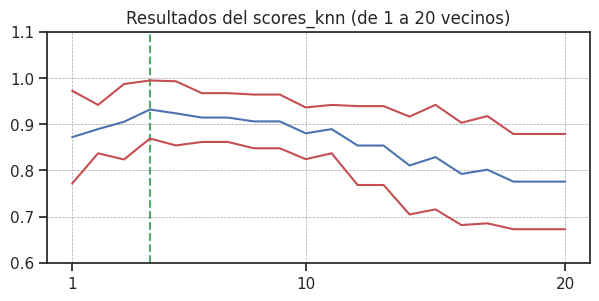

In [66]:
# Visualizamos los resultados
# Creamos la figura y ajustamos el tamaño de la figura para hacerlo menos alto
plt.figure(figsize=(7, 3))

plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
# Mostrar todas las etiquetas del eje x (suponiendo que df_scores['n_neighbours'] contiene todos los valores del eje x)
plt.xticks([1, 10, 20, 30, 40, 48, 50])
plt.title("Resultados del scores_knn (de 1 a 20 vecinos)")

# Agregar una línea de otro color en la etiqueta del número 48
plt.axvline(x=4, color='g', linestyle='--', label='Línea en el Número 9')

plt.plot(df_scores['n_neighbours'], df_scores['limite_inferior'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['score_medio'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['limite_superior'], color='r')
plt.ylim(0.6, 1.1);

In [37]:
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.871970,0.100472,1,0.771497,0.972442
1,0.889394,0.052399,2,0.836995,0.941793
2,0.905303,0.081681,3,0.823622,0.986984
3,0.931818,0.062838,4,0.868980,0.994656
4,0.923485,0.069470,5,0.854015,0.992955
5,0.914394,0.052819,6,0.861575,0.967213
6,0.914394,0.052819,7,0.861575,0.967213
7,0.906061,0.058112,8,0.847949,0.964172
8,0.906061,0.058112,9,0.847949,0.964172
9,0.880303,0.055958,10,0.824345,0.936261


In [65]:
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
3,0.931818,0.062838,4,0.86898,0.994656


In [39]:
# Asignamos el valor del k óptimo a una variable
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values[0]
best_k

4

In [67]:
# Elegir el modelo óptimo que nos había indicado cross validation

# Nos quedamos con "9" vecinos, porque es el que menos recursos utiliza.
modelo_knn = KNeighborsClassifier(n_neighbors=4)

# Lo ajustamos sobre datos de entrenamiento
modelo_knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=4)

In [68]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train, modelo_knn.predict(X_train_std))

0.9310344827586207

In [69]:
# Lo utilizamos para predecir en test
y_pred_knn = modelo_knn.predict(X_test_std)

# Lo utilizamos para predecir en test, los positivos
y_pred_proba_positiveKNN = modelo_knn.predict_proba(X_test_std)[:, 1]

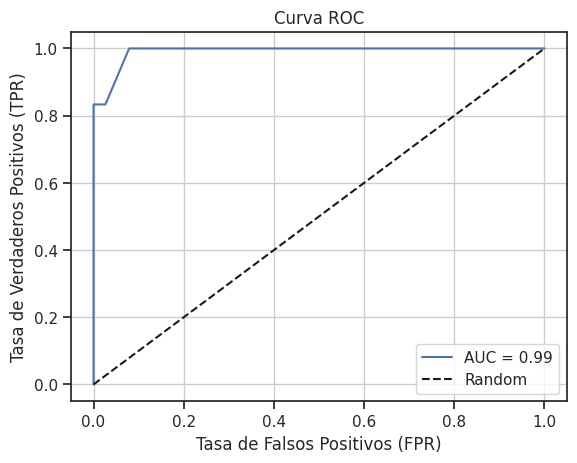

Exactitud: 0.96
Sensibilidad: 0.83
Precisión: 1.00
F1-score: 0.91
AUC-ROC: 0.99
Pérdida Logarítmica (Log Loss): 1.44


In [70]:
# Evaluamos el modelo
evaluarElModelo(X_test_std, y_test, modelo_knn)

In [71]:
# Computamos el accuracy score en test
accuracy_score(y_test, y_pred_knn)

0.96

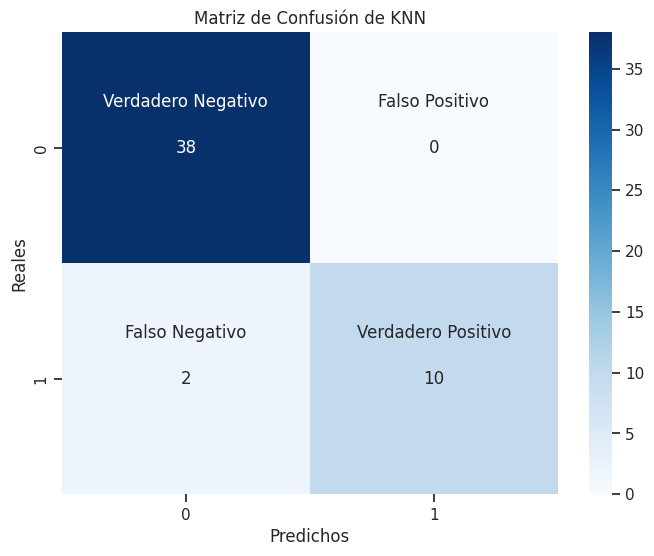

In [72]:
# Graficamos la matriz de confusión
graficarMatrizConfusion(y_test, y_pred_knn, title="Matriz de Confusión de KNN")

## 2.2. DecisionTreeClassifier

In [78]:
#Definir el Rango de Profundidades a Probar
param_grid = {'max_depth': range(1, 11)}

In [82]:
#Utilizar GridSearchCV para Encontrar la Profundidad Óptima
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11)})

In [83]:
#  Evaluar el Modelo en el Conjunto de Validación
best_depth = clf.best_params_['max_depth']
print("La profundidad óptima del árbol de decisión es:", best_depth)

La profundidad óptima del árbol de decisión es: 2


In [91]:
dtc = DecisionTreeClassifier(splitter='best', random_state=0, max_depth=2)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

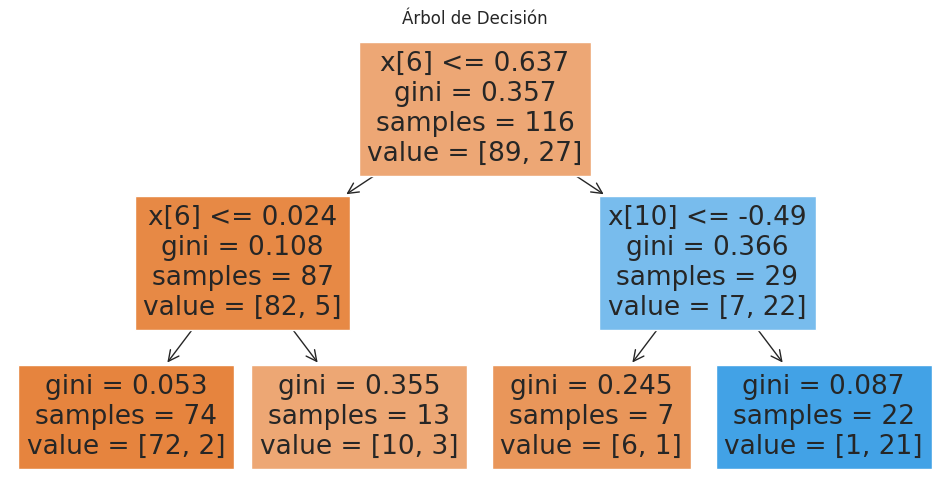

In [86]:
plt.figure(figsize=(12, 6))
plot_tree(dtc, filled=True)
plt.title("Árbol de Decisión")
plt.show()

In [87]:
y_pred_dt = dtc.predict(X_test_std)

# Lo utilizamos para predecir en test, los positivos
y_pred_proba_positivedt = dtc.predict_proba(X_test_std)[:, 1]

# accuracy
accuracy_score(y_test, y_pred_dt)

0.96

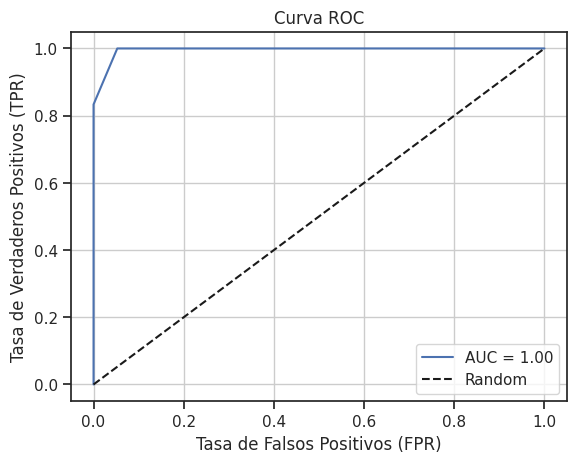

Exactitud: 0.96
Sensibilidad: 0.83
Precisión: 1.00
F1-score: 0.91
AUC-ROC: 1.00
Pérdida Logarítmica (Log Loss): 1.44


In [88]:
# Evaluamos el modelo
evaluarElModelo(X_test_std, y_test, dtc)

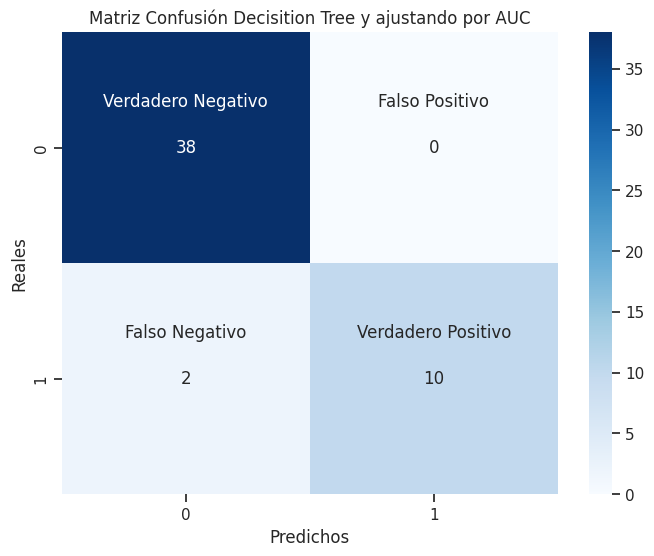

In [89]:
# Graficamos la matriz de confusión
graficarMatrizConfusion(y_test, y_pred_dt, title="Matriz Confusión Decisition Tree y ajustando por AUC")

## 2.3. Random Forest

In [92]:
# Definir el Rango de Hiperparámetros a Probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [93]:
# Utilizar GridSearchCV para Encontrar los Hiperparámetros Óptimos
clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [94]:
# Evaluar el Modelo en el Conjunto de Validación
best_params = clf.best_params_
print("Los mejores hiperparámetros encontrados:", best_params)

Los mejores hiperparámetros encontrados: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [100]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split= 10)
rf_classifier.fit(X_train_std, y_train)

RandomForestClassifier(min_samples_split=10, random_state=42)

In [101]:
y_pred_rf = rf_classifier.predict(X_test_std)

# Lo utilizamos para predecir en test, los positivos
y_pred_proba_positiverf = rf_classifier.predict_proba(X_test_std)[:, 1]

# accuracy
accuracy_score(y_test, y_pred_rf)

0.98

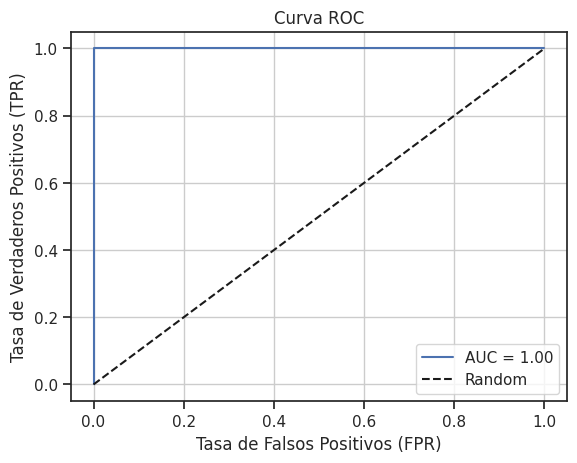

Exactitud: 0.98
Sensibilidad: 0.92
Precisión: 1.00
F1-score: 0.96
AUC-ROC: 1.00
Pérdida Logarítmica (Log Loss): 0.72


In [102]:
# Evaluamos el modelo
evaluarElModelo(X_test_std, y_test, rf_classifier)

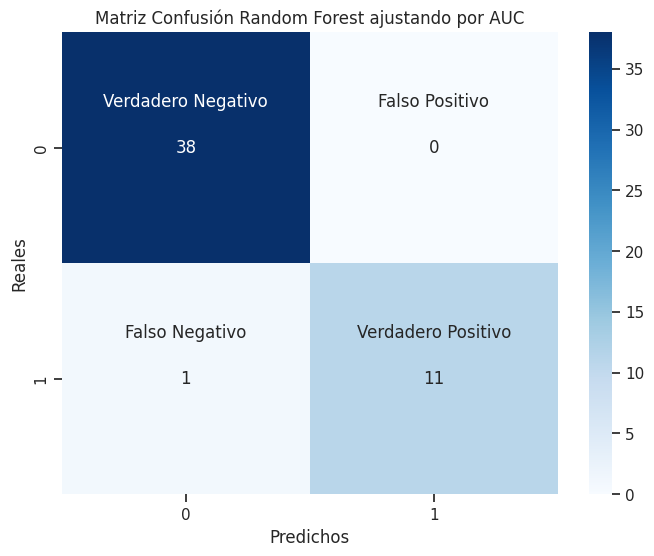

In [103]:
# Graficamos la matriz de confusión
graficarMatrizConfusion(y_test, y_pred_rf, title="Matriz Confusión Random Forest ajustando por AUC")

In [ ]:
importances = rf_classifier.feature_importances_

# Imprime las importancias de las variables
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

mo_negrot: 0.043582063182476725
mo_azult: 0.023454787631079138
mo_verdet: 0.03167235507532362
mo_rojot: 0.05487074694243225
microsegundos: 0.05754322961405372
tamaño_imagen: 0.08373575163137274
distanciacentro: 0.2074531498503144
cluster: 0.0018475900604307466
class: 0.00277799151129206
centrox: 0.0742641914650981
centroy: 0.14811069824694253
alto: 0.05785559442090085
ancho: 0.02144510133037788
proba: 0.03210579938278898
mo_negrot_i: 0.01480931581193229
mo_azult_i: 0.0237654785276391
mo_verdet_i: 0.023692270844073108
mo_rojot_i: 0.09701388447147166


In [ ]:
importances

array([0.04358206, 0.02345479, 0.03167236, 0.05487075, 0.05754323,
       0.08373575, 0.20745315, 0.00184759, 0.00277799, 0.07426419,
       0.1481107 , 0.05785559, 0.0214451 , 0.0321058 , 0.01480932,
       0.02376548, 0.02369227, 0.09701388])

## 2.4. Regresion Logistica

In [105]:
#se agrega la constante a la regresión
X_train_stats = sm.add_constant(X_train_std)

# Instanciamos la clase
logit = sm.Logit(y_train, X_train_std)

# Fiteamos el modelo
result = logit.fit()

# Imprimimos el resumen
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.140992
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               cercania   No. Observations:                  116
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                           17
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.7401
Time:                        18:11:23   Log-Likelihood:                -16.355
converged:                       True   LL-Null:                       -62.940
Covariance Type:            nonrobust   LLR p-value:                 1.611e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0138      1.378     -0.010      0.992      -2.715       2.687
x2             0.2310      0

### Cross Validation

In [106]:
clf = LogisticRegressionCV(cv=5, scoring='roc_auc' ,random_state=0)
clf.fit(X_train_std, y_train)

y_predic_RLCV = clf.predict(X_test_std)

# Lo utilizamos para predecir en test, los positivos
y_pred_proba_positiveRLCV = clf.predict_proba(X_test_std)[:, 1]

print("Test", clf.score(X_test_std, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Test 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

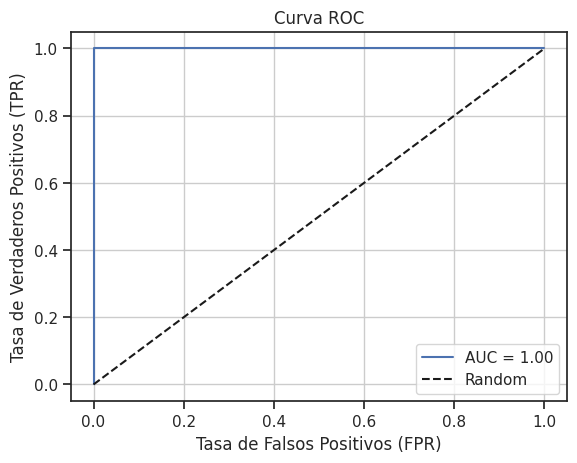

Exactitud: 0.96
Sensibilidad: 0.83
Precisión: 1.00
F1-score: 0.91
AUC-ROC: 1.00
Pérdida Logarítmica (Log Loss): 1.44


In [107]:
# Evaluamos el modelo
evaluarElModelo(X_test_std, y_test, clf)

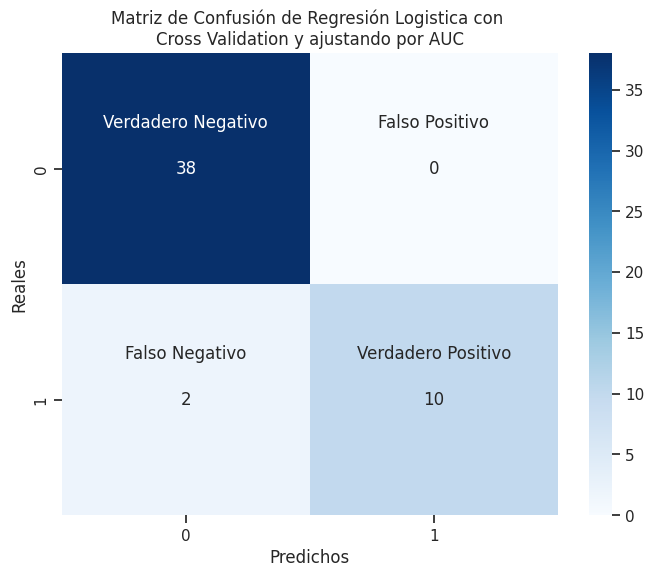

In [108]:
# Graficamos la matriz de confusión
graficarMatrizConfusion(y_test, y_predic_RLCV, title="Matriz de Confusión de Regresión Logistica con \nCross Validation y ajustando por AUC")

## 2.5.Regresion logistica con GridSearch

In [109]:
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],
    'C': [0.01, 0.1, 1],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
}

lr = LogisticRegression()

grid = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_std, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [110]:
print("Best hyperparameters: ", grid.best_params_)

Best hyperparameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [111]:
y_pred_gr = grid.predict(X_test_std)

# Lo utilizamos para predecir en test, los positivos
y_pred_proba_positivegr = grid.predict_proba(X_test_std)[:, 1]

# accuracy
accuracy_score(y_test, y_pred_gr)

0.98

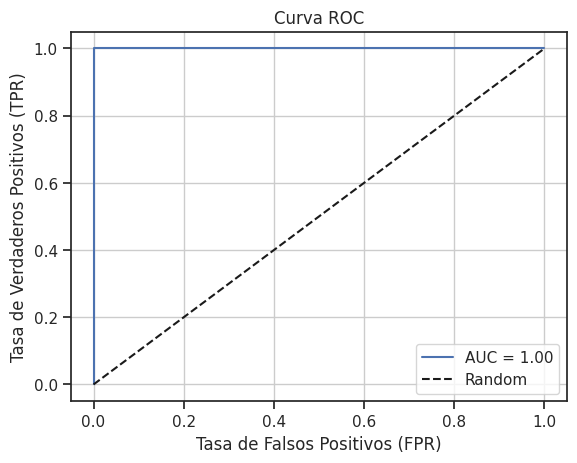

Exactitud: 0.98
Sensibilidad: 0.92
Precisión: 1.00
F1-score: 0.96
AUC-ROC: 1.00
Pérdida Logarítmica (Log Loss): 0.72


In [112]:
# Evaluamos el modelo
evaluarElModelo(X_test_std, y_test, grid)

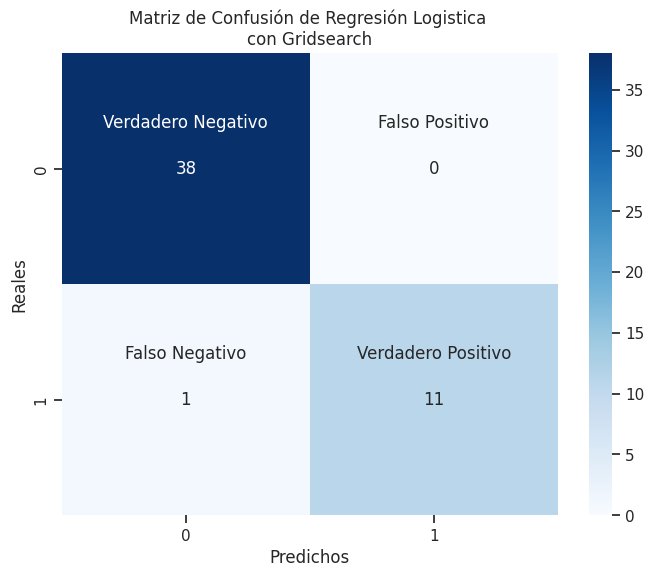

In [113]:
# Graficamos la matriz de confusión
graficarMatrizConfusion(y_test, y_pred_gr, title="Matriz de Confusión de Regresión Logistica \ncon Gridsearch")

El modelo que mejor ajusta teniendo en cuenta ROC y Matriz de confusión es la Regresión logistica con Ajuste.

In [ ]:
feature_names=X.columns

In [ ]:
X.columns

Index(['mo_negrot', 'mo_azult', 'mo_verdet', 'mo_rojot', 'microsegundos',
       'tamaño_imagen', 'distanciacentro', 'cluster', 'class', 'centrox',
       'centroy', 'alto', 'ancho', 'proba', 'mo_negrot_i', 'mo_azult_i',
       'mo_verdet_i', 'mo_rojot_i'],
      dtype='object')

In [ ]:
# Accede al mejor modelo (con los mejores hiperparámetros)
best_model = grid.best_estimator_

# Ahora puedes acceder a los coeficientes del mejor modelo
coeficientes = best_model.coef_
intercepto = best_model.intercept_

print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

Coeficientes: [[ 0.08875947  0.08664435  0.30767417  0.10182197  0.39405451 -0.24009556
   0.56870909  0.2046423   0.06774044  0.17833637  0.53004278 -0.30908818
   0.00481951 -0.04036262 -0.00799639  0.11770376  0.06915866 -0.20829708]]
Intercepto: [-0.92705404]


In [ ]:
# Obtenemos los coeficientes
matriz_numpy = np.array(coeficientes)
coeficientes = [valor for valor in matriz_numpy]

print(coeficientes[0])

feature_names = X.columns



[ 0.08875947  0.08664435  0.30767417  0.10182197  0.39405451 -0.24009556
  0.56870909  0.2046423   0.06774044  0.17833637  0.53004278 -0.30908818
  0.00481951 -0.04036262 -0.00799639  0.11770376  0.06915866 -0.20829708]


In [ ]:
for feature, coef in zip(feature_names, coeficientes[0]):
    print(f"{feature}: {coef:.4f}")


mo_negrot: 0.0888
mo_azult: 0.0866
mo_verdet: 0.3077
mo_rojot: 0.1018
microsegundos: 0.3941
tamaño_imagen: -0.2401
distanciacentro: 0.5687
cluster: 0.2046
class: 0.0677
centrox: 0.1783
centroy: 0.5300
alto: -0.3091
ancho: 0.0048
proba: -0.0404
mo_negrot_i: -0.0080
mo_azult_i: 0.1177
mo_verdet_i: 0.0692
mo_rojot_i: -0.2083


# Comparación

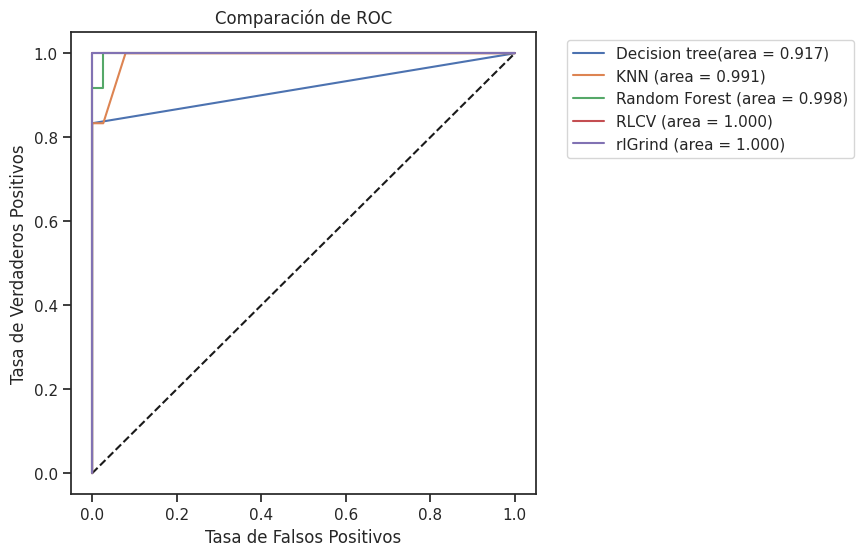

In [ ]:

# Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_positivedt)


#KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_positiveKNN)

# Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_positiverf)


# Regresion Logistica con GridSearch- normal
fpr_gr, tpr_gr, thresholds_gr = roc_curve(y_test, y_pred_proba_positivegr)

fpr_rlcv, tpr_rlcv, thresholds_rlcv = roc_curve(y_test, y_pred_proba_positiveRLCV)

auc_dt = auc(fpr_dt, tpr_dt)



auc_knn = auc(fpr_knn, tpr_knn)

auc_rf = auc(fpr_rf, tpr_rf)

auc_gr = auc(fpr_gr, tpr_gr)
auc_rlcv = auc(fpr_rlcv, tpr_rlcv)

# Creamos la figura y ajustamos el tamaño de la figura para hacerlo menos alto
plt.figure(figsize=(6, 6))

plt.plot([0, 1], [0, 1], 'k--')


# plt.plot(fpr_lr, tpr_lr, label='RLA (area = {:.3f})'.format(auc_lr))

plt.plot(fpr_dt, tpr_dt, label='Decision tree(area = {:.3f})'.format(auc_dt))

plt.plot(fpr_knn, tpr_knn, label='KNN (area = {:.3f})'.format(auc_knn))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = {:.3f})'.format(auc_rf))

plt.plot(fpr_rlcv, tpr_rlcv, label='RLCV (area = {:.3f})'.format(auc_rlcv))

plt.plot(fpr_gr, tpr_gr, label='rlGrind (area = {:.3f})'.format(auc_gr))

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparación de ROC')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
